In [4]:
import geopandas as gpd
from pyproj import Proj, transform
# from shapely.geometry import Polygon, MultiPolygon, Point

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["figure.figsize"] = (10, 10)
# import seaborn as sns

import folium 
import warnings
warnings.filterwarnings("ignore")

In [2]:
## 좌표 -> 주소
# from geopy.geocoders import Nominatim

# def geocoding_reverse(lat_lng_str): 
#     geolocoder = Nominatim(user_agent = 'South Korea', timeout=None)
#     address = geolocoder.reverse(lat_lng_str)

#     return address

# address = geocoding_reverse('37.534531756342524, 126.97524458643717')
# print(address)

이태원로2길, 한강로1가, 한강로동, 용산구, 서울특별시, 04375, 대한민국


In [40]:
data = pd.read_csv("./data/전국주차장정보표준데이터.csv", encoding="cp949")
data = data[data["관리기관명"].apply(lambda x : True if "부산" in x else False)]
parking_data = data[["주차장명", "주차장구분", "소재지지번주소", "위도", "경도"]]

In [41]:
def wgs2utmk(df:pd.Series): 
    proj_WGS84 = Proj(init="epsg:4326")
    proj_UTMK = Proj(init="epsg:5178")
    return pd.Series(transform(proj_WGS84, proj_UTMK, df["경도"], df["위도"]))

In [42]:
parking_data[["X좌표", "Y좌표"]] = parking_data[["위도", "경도"]].apply(wgs2utmk, axis=1)
parking_data = gpd.GeoDataFrame(parking_data, geometry=gpd.points_from_xy(parking_data["X좌표"], parking_data["Y좌표"]))

In [43]:
parking_data

,주차장명,주차장구분,소재지지번주소,위도,경도,X좌표,Y좌표,geometry
378,동주마루 공영주차장,공영,부산광역시 사하구 괴정동 380-36,35.100132,129.002216,1.137112e+06,1.679059e+06,POINT (1137112.258 1679059.255)
398,괴정천복개로(하단동) 공영주차장,공영,부산광역시 사하구 하단동 870-6,35.102916,128.968125,1.134000e+06,1.679322e+06,POINT (1134000.218 1679321.635)
399,사하구청 앞 공영주차장,공영,부산광역시 사하구 당리동 317-100,35.103708,128.974997,1.134625e+06,1.679419e+06,POINT (1134625.322 1679418.772)
400,괴정3동 공영주차장,공영,부산광역시 사하구 장림동 328-4,35.082158,128.967134,1.133944e+06,1.677018e+06,POINT (1133943.886 1677017.966)
401,당리동 샛별공원 지하공영주차장,공영,부산광역시 사하구 장림동 328-4,35.082158,128.967134,1.133944e+06,1.677018e+06,POINT (1133943.886 1677017.966)
...,...,...,...,...,...,...,...,...
16981,행운주차장,민영,부산광역시 해운대구 반여동873,NaN,NaN,NaN,NaN,POINT EMPTY
16982,향토주차장,민영,"부산광역시 해운대구 우동 441-3,9,10",NaN,NaN,NaN,NaN,POINT EMPTY
16983,현대주차장,민영,"부산광역시 해운대구 우동 541-16,21,23",35.162277,129.159375,1.151323e+06,1.686180e+06,POINT (1151322.673 1686179.540)
16984,흥안인더스트리,민영,부산광역시 해운대구 우동626-4,NaN,NaN,NaN,NaN,POINT EMPTY


출처 : http://www.gisdeveloper.co.kr/?p=2332

In [44]:
file_ = "./data/sig.shp"
busan_geo = gpd.read_file(file_, encoding = "cp949")
busan_geo = busan_geo[busan_geo["SIG_CD"].apply(lambda x: True if x[:2] == "26" else False)]

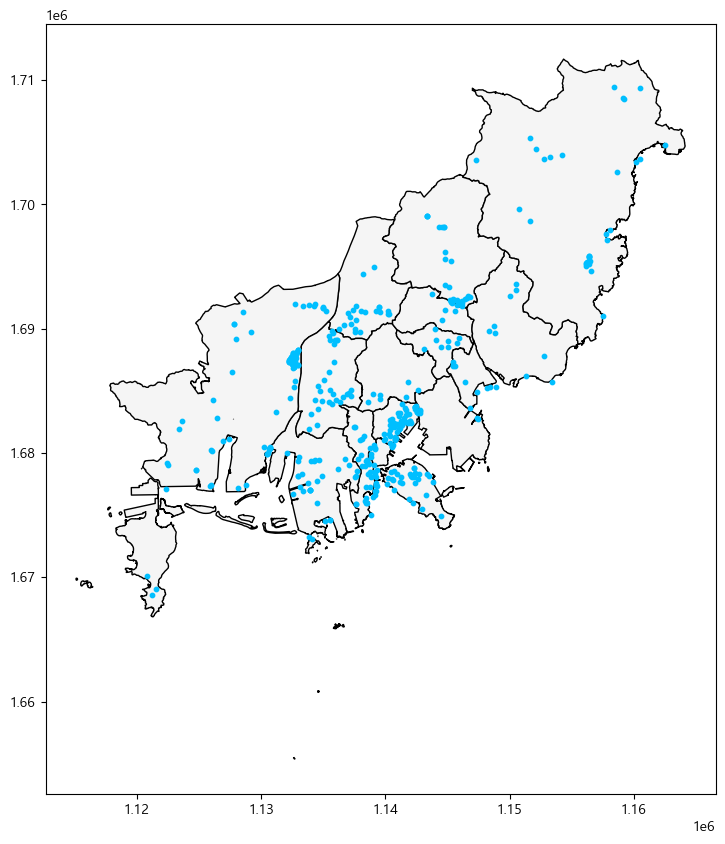

In [45]:
ax = busan_geo.plot( 
    figsize=(10, 10), 
    color = "whitesmoke", 
    edgecolor = "black", 
    linewidth = 1,
    column='SIG_KOR_NM', 
    # cmap="coolwarm",  ## tab20b 
    legend=True, 
    categorical=True
    )
# ax.axis("off")
parking_data.plot(
    ax=ax, 
    color="deepskyblue", 
    markersize=10
    )
plt.show()

In [19]:
map = folium.Map(location = [35.1856505,129.1], zoom_start=10)

In [5]:
m = folium.Map(location=[37.53897093698831, 127.05461953077439], 
               zoom_start=14)

# Circle
folium.Circle(
    location=[37.54455152583346, 127.05564949938811],
    radius=100, # 원 크기
    color='#eb9e34', # 원 선 색상
    fill_color='red', # 원 내부 색상
    popup='Circle popup',
    tooltip='Circle tooltip'
).add_to(m)

# CircleMarker
folium.CircleMarker(
    [37.54455152583346, 127.05564949938811],
    radius=100,
    fill=True,
    color='#34ebc6',
    fill_color='#c634eb',
    popup='CircleMarker popup',
    tooltip='CircleMarker tooltip'
).add_to(m)

m